# Gold

In [1]:
import numpy as np
import pandas as pd

In [120]:
xls = pd.ExcelFile("Raw_Data_D.xlsx")
Gold_data = pd.read_excel(xls,'Gold')

In [121]:
Gold_data['Goldbar_Sale']

0       26700
1       26850
2       26950
3       26950
4       27300
        ...  
1327    40300
1328    40600
1329    40500
1330    40400
1331    40550
Name: Goldbar_Sale, Length: 1332, dtype: int64

In [122]:
Gold_data.columns

Index(['Date', 'Goldbar_Buy', 'Goldbar_Sale', 'Goldjew_Buy', 'Goldjew_Sale'], dtype='object')

In [123]:
Data_ = pd.DataFrame()
Data_['Report Date'] = Gold_data['Date']
Data_['Gold'] = Gold_data['Goldbar_Sale']

In [125]:
Data_['%CHANGE'] = (Data_['Gold'] - Data_['Gold'].shift(1)) / (Data_['Gold'])

In [126]:
Data_

,Report Date,Gold,%CHANGE
0,2021-01-01,26700,NaN
1,2021-01-02,26850,0.005587
2,2021-01-03,26950,0.003711
3,2021-01-04,26950,0.000000
4,2021-01-06,27300,0.012821
...,...,...,...
1327,2024-08-27,40300,-0.003722
1328,2024-08-28,40600,0.007389
1329,2024-08-29,40500,-0.002469
1330,2024-08-30,40400,-0.002475


In [127]:
Data_['%CHANGE'].fillna(0, inplace=True)

C:\Users\temp5\AppData\Local\Temp\ipykernel_38412\8145372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_['%CHANGE'].fillna(0, inplace=True)


สมมติว่า 1 คือ ไม่ควรลงทุน และ 0 คือควรลงทุน

In [128]:
Data_['Decision'] = ['0' if i > 0 else '1' for i in Data_['%CHANGE']]

In [155]:
Data_test = Data_[Data_['Report Date'] <= '2023-12-31']
X = Data_test['%CHANGE'].values
y = Data_test['Decision'].values

In [156]:
Data_test

,Report Date,Gold,%CHANGE,Decision
0,2021-01-01,26700,0.000000,1
1,2021-01-02,26850,0.005587,0
2,2021-01-03,26950,0.003711,0
3,2021-01-04,26950,0.000000,1
4,2021-01-06,27300,0.012821,0
...,...,...,...,...
1083,2023-12-27,33700,0.002967,0
1084,2023-12-28,33800,0.002959,0
1085,2023-12-29,33700,-0.002967,1
1086,2023-12-30,33650,-0.001486,1


In [157]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [164]:
# pip install imblearn

In [159]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

X_train, y_train = X ,y
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression(class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_train, y_pred))


Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       469
           1       1.00      1.00      1.00       619

    accuracy                           1.00      1088
   macro avg       1.00      1.00      1.00      1088
weighted avg       1.00      1.00      1.00      1088



C:\Users\temp5\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
Data_test['Predict'] = y_pred

C:\Users\temp5\AppData\Local\Temp\ipykernel_38412\177097520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_test['Predict'] = y_pred


In [166]:
Data_test

,Report Date,Gold,%CHANGE,Decision,Predict,Description
0,2021-01-01,26700,0.000000,1,1,ไม่ควรลงทุน
1,2021-01-02,26850,0.005587,0,0,ควรลงทุน
2,2021-01-03,26950,0.003711,0,0,ควรลงทุน
3,2021-01-04,26950,0.000000,1,1,ไม่ควรลงทุน
4,2021-01-06,27300,0.012821,0,0,ควรลงทุน
...,...,...,...,...,...,...
1083,2023-12-27,33700,0.002967,0,0,ควรลงทุน
1084,2023-12-28,33800,0.002959,0,0,ควรลงทุน
1085,2023-12-29,33700,-0.002967,1,1,ไม่ควรลงทุน
1086,2023-12-30,33650,-0.001486,1,1,ไม่ควรลงทุน


In [167]:
Data_test['Description'] = ['ไม่ควรลงทุน' if i == '1' else 'ควรลงทุน' for i in Data_test['Predict']]

C:\Users\temp5\AppData\Local\Temp\ipykernel_38412\3540882849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_test['Description'] = ['ไม่ควรลงทุน' if i == '1' else 'ควรลงทุน' for i in Data_test['Predict']]


In [169]:
Data_test[Data_test['Predict'] == '0']

,Report Date,Gold,%CHANGE,Decision,Predict,Description
1,2021-01-02,26850,0.005587,0,0,ควรลงทุน
2,2021-01-03,26950,0.003711,0,0,ควรลงทุน
4,2021-01-06,27300,0.012821,0,0,ควรลงทุน
5,2021-01-07,27550,0.009074,0,0,ควรลงทุน
6,2021-01-08,27650,0.003617,0,0,ควรลงทุน
...,...,...,...,...,...,...
1076,2023-12-20,33550,0.008942,0,0,ควรลงทุน
1077,2023-12-21,33600,0.001488,0,0,ควรลงทุน
1078,2023-12-22,33700,0.002967,0,0,ควรลงทุน
1083,2023-12-27,33700,0.002967,0,0,ควรลงทุน


In [170]:
Data_act = Data_[Data_['Report Date'] > '2023-12-31']
Data_act

,Report Date,Gold,%CHANGE,Decision
1088,2024-01-01,33650,0.000000,1
1089,2024-01-02,33650,0.000000,1
1090,2024-01-03,33650,0.000000,1
1091,2024-01-04,33600,-0.001488,1
1092,2024-01-05,33500,-0.002985,1
...,...,...,...,...
1327,2024-08-27,40300,-0.003722,1
1328,2024-08-28,40600,0.007389,0
1329,2024-08-29,40500,-0.002469,1
1330,2024-08-30,40400,-0.002475,1


In [171]:
G_CH = Data_act['%CHANGE'].values

In [176]:
G_CH = G_CH.reshape(-1,1)

In [177]:
y_pred_g_ch = model.predict(G_CH)

In [178]:
y_pred_g_ch

array(['1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0',
       '1', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1',
       '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0',
       '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1',
       '1', '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1',
       '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0',
       '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0',
       '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0',
       '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0',
       '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1

In [179]:
Data_act['Predict'] = y_pred_g_ch

C:\Users\temp5\AppData\Local\Temp\ipykernel_38412\2767827990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_act['Predict'] = y_pred_g_ch


In [180]:
Data_act['Description'] = ['ไม่ควรลงทุน' if i == '1' else 'ควรลงทุน' for i in Data_act['Predict']]

C:\Users\temp5\AppData\Local\Temp\ipykernel_38412\3153019499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_act['Description'] = ['ไม่ควรลงทุน' if i == '1' else 'ควรลงทุน' for i in Data_act['Predict']]


In [181]:
Data_act

,Report Date,Gold,%CHANGE,Decision,Predict,Description
1088,2024-01-01,33650,0.000000,1,1,ไม่ควรลงทุน
1089,2024-01-02,33650,0.000000,1,1,ไม่ควรลงทุน
1090,2024-01-03,33650,0.000000,1,1,ไม่ควรลงทุน
1091,2024-01-04,33600,-0.001488,1,1,ไม่ควรลงทุน
1092,2024-01-05,33500,-0.002985,1,1,ไม่ควรลงทุน
...,...,...,...,...,...,...
1327,2024-08-27,40300,-0.003722,1,1,ไม่ควรลงทุน
1328,2024-08-28,40600,0.007389,0,0,ควรลงทุน
1329,2024-08-29,40500,-0.002469,1,1,ไม่ควรลงทุน
1330,2024-08-30,40400,-0.002475,1,1,ไม่ควรลงทุน


In [189]:
dates = Data_act['Report Date']
predictions = Data_act['Predict'].values
gold_prices = Data_act['Gold'].values

In [185]:
import matplotlib.pyplot as plt

C:\Users\temp5\AppData\Local\Temp\ipykernel_38412\3777399354.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


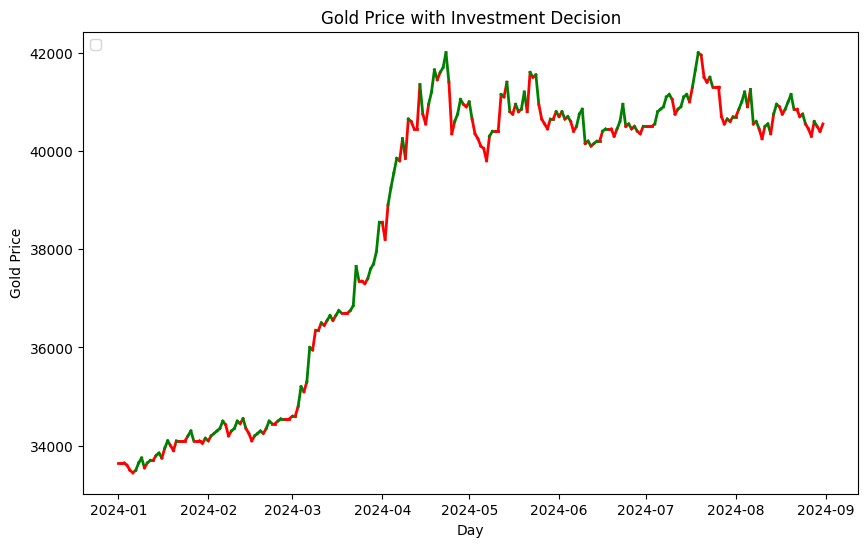

In [195]:
plt.figure(figsize=(10, 6))

for i in range(len(Data_act) - 1):
    if predictions[i] == '0':
        plt.plot(dates[i:i+2], gold_prices[i:i+2], color='green', lw=2, label='Invest' if i == '0' else "")
    else:
        plt.plot(dates[i:i+2], gold_prices[i:i+2], color='red', lw=2, label='Don\'t Invest' if i == '1' else "")

plt.xlabel('Day')
plt.ylabel('Gold Price')
plt.title('Gold Price with Investment Decision')
plt.legend(loc='upper left')
plt.show()

# XAU_USD

In [7]:
XAU_data = pd.read_csv('RawData_XAU_USD.csv')

In [8]:
XAU_data

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,01/01/2021,"1,898.10","1,897.69","1,899.12","1,897.39",NaN,0.09%
1,01/04/2021,"1,942.28","1,906.05","1,944.65","1,905.36",NaN,2.33%
2,01/05/2021,"1,949.35","1,942.65","1,953.17","1,934.08",NaN,0.36%
3,01/06/2021,"1,918.81","1,950.30","1,959.60","1,901.11",NaN,-1.57%
4,01/07/2021,"1,912.50","1,919.40","1,927.97","1,906.86",NaN,-0.33%
...,...,...,...,...,...,...,...
979,10/07/2024,"2,643.58","2,651.20","2,659.91","2,637.70",NaN,-0.33%
980,10/08/2024,"2,621.94","2,643.50","2,653.09","2,604.79",NaN,-0.82%
981,10/09/2024,"2,607.77","2,620.19","2,624.65","2,605.18",NaN,-0.54%
982,10/10/2024,"2,633.27","2,608.65","2,635.69","2,604.18",NaN,0.98%


In [9]:
XAU_data = XAU_data.drop(columns=['ปริมาณ'])

In [16]:
XAU_data['วันเดือนปี'] = pd.to_datetime(XAU_data['วันเดือนปี'], format='%m/%d/%Y')
XAU_data['วันเดือนปี'] = XAU_data['วันเดือนปี'].dt.strftime('%Y-%m-%d')

In [19]:
XAU_train_data = XAU_data[XAU_data['วันเดือนปี'] <= '2023-12-31']

In [20]:
XAU_train_data

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,% เปลี่ยน
0,2021-01-01,"1,898.10","1,897.69","1,899.12","1,897.39",0.09%
1,2021-01-04,"1,942.28","1,906.05","1,944.65","1,905.36",2.33%
2,2021-01-05,"1,949.35","1,942.65","1,953.17","1,934.08",0.36%
3,2021-01-06,"1,918.81","1,950.30","1,959.60","1,901.11",-1.57%
4,2021-01-07,"1,912.50","1,919.40","1,927.97","1,906.86",-0.33%
...,...,...,...,...,...,...
775,2023-12-25,"2,054.93","2,054.32","2,058.36","2,053.96",0.10%
776,2023-12-26,"2,066.60","2,055.73","2,068.65","2,053.59",0.57%
777,2023-12-27,"2,077.16","2,066.70","2,084.59","2,061.00",0.51%
778,2023-12-28,"2,064.86","2,077.34","2,088.54","2,065.89",-0.59%


In [21]:
XAU_test_data = XAU_data[XAU_data['วันเดือนปี'] > '2023-12-31']

In [22]:
XAU_test_data

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,% เปลี่ยน
780,2024-01-01,"2,063.80","2,064.24","2,074.90","2,063.30",0.06%
781,2024-01-02,"2,058.88","2,062.90","2,079.02","2,056.04",-0.24%
782,2024-01-03,"2,040.78","2,059.15","2,066.12","2,030.68",-0.88%
783,2024-01-04,"2,043.26","2,041.34","2,051.40","2,036.24",0.12%
784,2024-01-05,"2,045.50","2,043.69","2,064.03","2,024.49",0.11%
...,...,...,...,...,...,...
979,2024-10-07,"2,643.58","2,651.20","2,659.91","2,637.70",-0.33%
980,2024-10-08,"2,621.94","2,643.50","2,653.09","2,604.79",-0.82%
981,2024-10-09,"2,607.77","2,620.19","2,624.65","2,605.18",-0.54%
982,2024-10-10,"2,633.27","2,608.65","2,635.69","2,604.18",0.98%


In [49]:
XAU_test_data['ล่าสุด'] = XAU_test_data['ล่าสุด'].str.replace(',','').astype(float)

C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\1747505777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XAU_test_data['ล่าสุด'] = XAU_test_data['ล่าสุด'].str.replace(',','').astype(float)


In [37]:
XAU_train_data['ล่าสุด'] = XAU_train_data['ล่าสุด'].str.replace(',','').astype(float)

C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\806847701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XAU_train_data['ล่าสุด'] = XAU_train_data['ล่าสุด'].str.replace(',','').astype(float)


In [38]:
XAU_train_data['%CHANGE'] = (XAU_train_data['ล่าสุด'] - XAU_train_data['ล่าสุด'].shift(1)) / XAU_train_data['ล่าสุด']

C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\3976912722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XAU_train_data['%CHANGE'] = (XAU_train_data['ล่าสุด'] - XAU_train_data['ล่าสุด'].shift(1)) / XAU_train_data['ล่าสุด']


In [55]:
XAU_test_data['%CHANGE'] = (XAU_test_data['ล่าสุด'] - XAU_test_data['ล่าสุด'].shift(1)) / XAU_test_data['ล่าสุด']

C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\2435689128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XAU_test_data['%CHANGE'] = (XAU_test_data['ล่าสุด'] - XAU_test_data['ล่าสุด'].shift(1)) / XAU_test_data['ล่าสุด']


In [39]:
XAU_train_data['Decision'] = ['0' if i > 0 else '1' for i in XAU_train_data['%CHANGE']]

C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\2257045211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XAU_train_data['Decision'] = ['0' if i > 0 else '1' for i in XAU_train_data['%CHANGE']]


In [42]:
XAU_train_data

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,% เปลี่ยน,%CHANGE,Decision
0,2021-01-01,1898.10,"1,897.69","1,899.12","1,897.39",0.09%,0.000000,1
1,2021-01-04,1942.28,"1,906.05","1,944.65","1,905.36",2.33%,0.022746,0
2,2021-01-05,1949.35,"1,942.65","1,953.17","1,934.08",0.36%,0.003627,0
3,2021-01-06,1918.81,"1,950.30","1,959.60","1,901.11",-1.57%,-0.015916,1
4,2021-01-07,1912.50,"1,919.40","1,927.97","1,906.86",-0.33%,-0.003299,1
...,...,...,...,...,...,...,...,...
775,2023-12-25,2054.93,"2,054.32","2,058.36","2,053.96",0.10%,0.000949,0
776,2023-12-26,2066.60,"2,055.73","2,068.65","2,053.59",0.57%,0.005647,0
777,2023-12-27,2077.16,"2,066.70","2,084.59","2,061.00",0.51%,0.005084,0
778,2023-12-28,2064.86,"2,077.34","2,088.54","2,065.89",-0.59%,-0.005957,1


In [41]:
XAU_train_data['%CHANGE'].fillna(0, inplace=True)

C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\1120076909.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  XAU_train_data['%CHANGE'].fillna(0, inplace=True)
C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\1120076909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XAU_train_data['%CHANGE'].fillna(0, inplace=True)


In [62]:
XAU_test_data['%CHANGE'].fillna(0, inplace=True)

C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\4233123289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  XAU_test_data['%CHANGE'].fillna(0, inplace=True)
C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\4233123289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XAU_test_data['%CHANGE'].fillna(0, inplace=True)


In [46]:
X , y = np.array(XAU_train_data['%CHANGE'].values) , np.array(XAU_train_data['Decision'])

In [47]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

X_train, y_train = X ,y
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression(class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_train, y_pred))


Accuracy: 99.49%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       398
           1       1.00      0.99      0.99       382

    accuracy                           0.99       780
   macro avg       1.00      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



C:\Users\temp5\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
X_test = np.array(XAU_test_data['%CHANGE'].values)

In [64]:
X_test = X_test.reshape(-1,1)

In [65]:
X_test

array([[ 0.00000000e+00],
       [-2.38964874e-03],
       [-8.86915787e-03],
       [ 1.21374666e-03],
       [ 1.09508678e-03],
       [-8.70877387e-03],
       [ 8.62243113e-04],
       [-3.05920727e-03],
       [ 2.31252065e-03],
       [ 1.00697021e-02],
       [ 2.80848288e-03],
       [-1.32669820e-02],
       [-1.09038151e-02],
       [ 8.38001256e-03],
       [ 3.16397991e-03],
       [-4.00793670e-03],
       [ 3.79555280e-03],
       [-7.99964225e-03],
       [ 3.54499319e-03],
       [-6.98593894e-04],
       [ 6.60022148e-03],
       [ 2.14623893e-03],
       [ 5.25233287e-04],
       [ 8.61359975e-03],
       [-7.99572253e-03],
       [-6.87519448e-03],
       [ 5.30101304e-03],
       [-6.09570253e-04],
       [-5.11513983e-04],
       [-4.45616947e-03],
       [-2.16359126e-03],
       [-1.38846360e-02],
       [ 1.30496539e-04],
       [ 5.83806116e-03],
       [ 4.47568427e-03],
       [ 2.24520849e-03],
       [ 2.91569683e-03],
       [ 7.20991215e-04],
       [-4.3

In [66]:
y_pred_xau = model.predict(X_test)

In [67]:
y_pred_xau

array(['0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1',
       '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1',
       '0', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1',
       '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0',
       '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1',
       '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0',
       '0', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0',
       '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1',
       '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1',
       '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0',
       '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0

In [69]:
XAU_test_data['Decision'] = y_pred_xau

C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\2033339019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XAU_test_data['Decision'] = y_pred_xau


In [70]:
XAU_test_data

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,% เปลี่ยน,%CHANGE,Decision
780,2024-01-01,2063.80,"2,064.24","2,074.90","2,063.30",0.06%,0.000000,0
781,2024-01-02,2058.88,"2,062.90","2,079.02","2,056.04",-0.24%,-0.002390,1
782,2024-01-03,2040.78,"2,059.15","2,066.12","2,030.68",-0.88%,-0.008869,1
783,2024-01-04,2043.26,"2,041.34","2,051.40","2,036.24",0.12%,0.001214,0
784,2024-01-05,2045.50,"2,043.69","2,064.03","2,024.49",0.11%,0.001095,0
...,...,...,...,...,...,...,...,...
979,2024-10-07,2643.58,"2,651.20","2,659.91","2,637.70",-0.33%,-0.003280,1
980,2024-10-08,2621.94,"2,643.50","2,653.09","2,604.79",-0.82%,-0.008253,1
981,2024-10-09,2607.77,"2,620.19","2,624.65","2,605.18",-0.54%,-0.005434,1
982,2024-10-10,2633.27,"2,608.65","2,635.69","2,604.18",0.98%,0.009684,0


In [71]:
dates = XAU_test_data['วันเดือนปี']
predictions = XAU_test_data['Decision'].values
gold_prices = XAU_test_data['ล่าสุด'].values

In [72]:
import matplotlib.pyplot as plt

C:\Users\temp5\AppData\Local\Temp\ipykernel_39896\4071927227.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


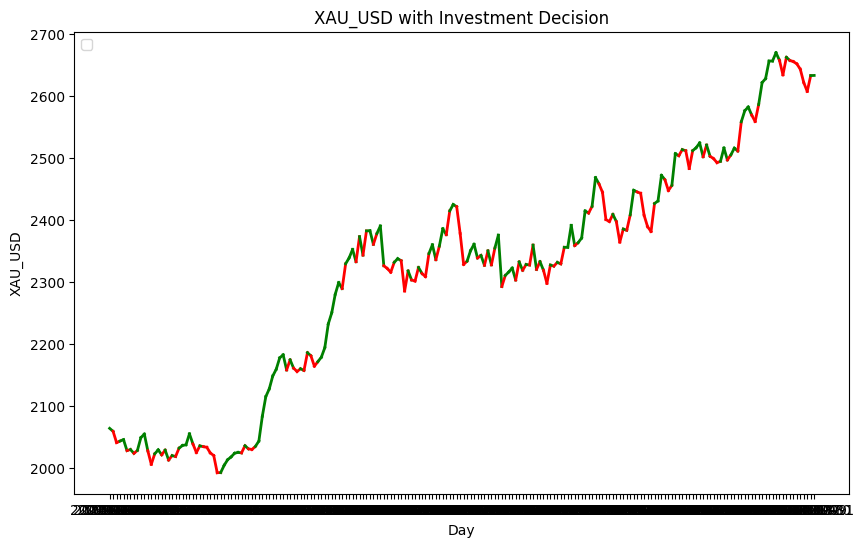

In [74]:
plt.figure(figsize=(10, 6))

for i in range(len(XAU_test_data) - 1):
    if predictions[i] == '0':
        plt.plot(dates[i:i+2], gold_prices[i:i+2], color='green', lw=2, label='Invest' if i == '0' else "")
    else:
        plt.plot(dates[i:i+2], gold_prices[i:i+2], color='red', lw=2, label='Don\'t Invest' if i == '1' else "")

plt.xlabel('Day')
plt.ylabel('XAU_USD')
plt.title('XAU_USD with Investment Decision')
plt.legend(loc='upper left')
plt.show()